In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
df = df.rename(columns={'crim':'crime_rate','zn':'res_land_pct','indus':'indus_land_pct','chas':'near_river','nox':'air_pollution','rm':'avg_rooms','dis':'dist_to_job','rad':'highway_access','ptratio':'pupil_teacher','b':'black_prop_index','lstat':'lower_status_pct','medv':'house_price'})

In [6]:
df.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   crime_rate        506 non-null    float64
 1   res_land_pct      506 non-null    float64
 2   indus_land_pct    506 non-null    float64
 3   near_river        506 non-null    int64  
 4   air_pollution     506 non-null    float64
 5   avg_rooms         501 non-null    float64
 6   age               506 non-null    float64
 7   dist_to_job       506 non-null    float64
 8   highway_access    506 non-null    int64  
 9   tax               506 non-null    int64  
 10  pupil_teacher     506 non-null    float64
 11  black_prop_index  506 non-null    float64
 12  lower_status_pct  506 non-null    float64
 13  house_price       506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.describe()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

crime_rate          0
res_land_pct        0
indus_land_pct      0
near_river          0
air_pollution       0
avg_rooms           5
age                 0
dist_to_job         0
highway_access      0
tax                 0
pupil_teacher       0
black_prop_index    0
lower_status_pct    0
house_price         0
dtype: int64

In [12]:
df['avg_rooms'] = df['avg_rooms'].fillna(df['avg_rooms'].mean()) 

In [13]:
df.isna().sum()

crime_rate          0
res_land_pct        0
indus_land_pct      0
near_river          0
air_pollution       0
avg_rooms           0
age                 0
dist_to_job         0
highway_access      0
tax                 0
pupil_teacher       0
black_prop_index    0
lower_status_pct    0
house_price         0
dtype: int64

<Axes: >

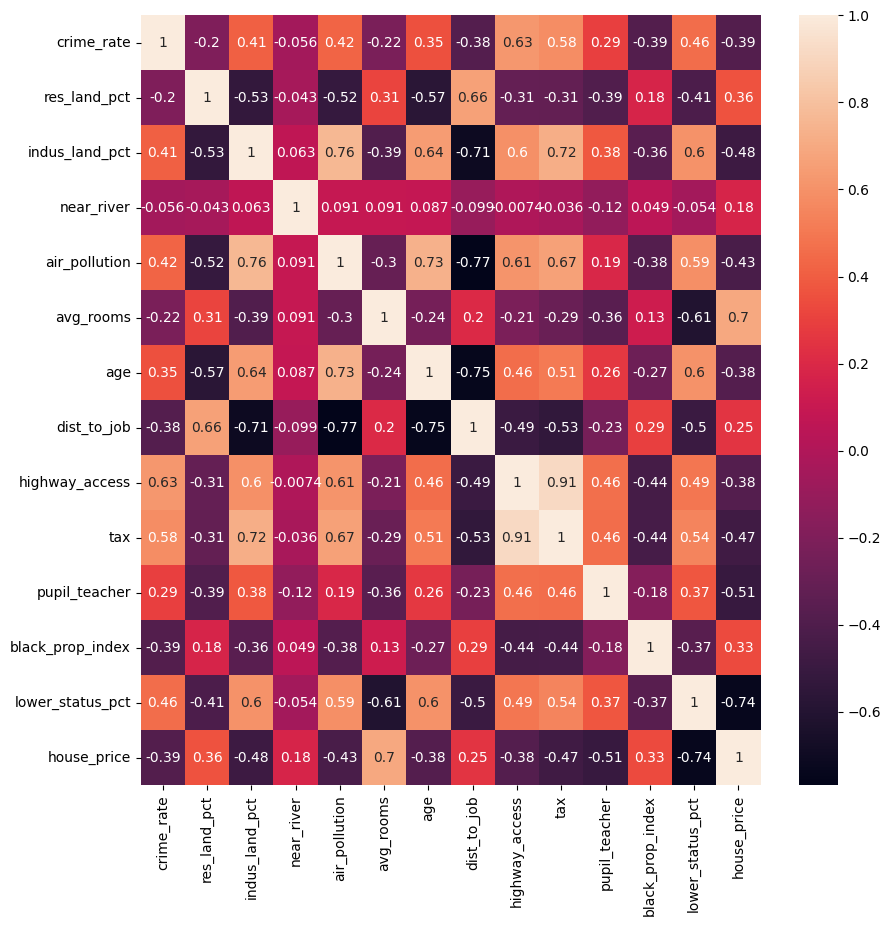

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [15]:
df.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
df['near_river'] = df['near_river'].astype('category')

<Axes: ylabel='res_land_pct'>

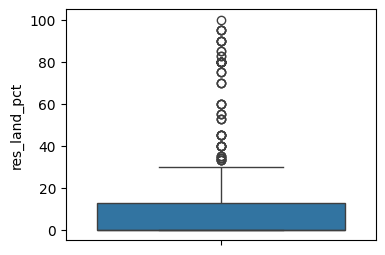

In [17]:
plt.figure(figsize=(4,3))
sns.boxplot(df['res_land_pct'])

In [18]:
#removing outlier
def oultier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)

    iqr = q3 - q1

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

In [19]:
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns

In [20]:
numeric_col

Index(['crime_rate', 'res_land_pct', 'indus_land_pct', 'air_pollution',
       'avg_rooms', 'age', 'dist_to_job', 'highway_access', 'tax',
       'pupil_teacher', 'black_prop_index', 'lower_status_pct', 'house_price'],
      dtype='object')

In [21]:
df_clean = df.copy()

In [22]:
for col1 in numeric_col:
    df_clean = oultier(df_clean, col1)

In [23]:
df = df_clean.copy()

In [24]:
df.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


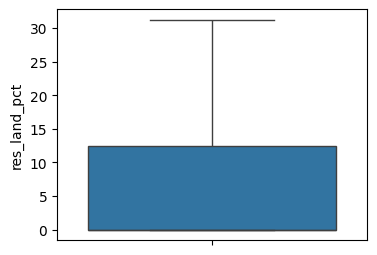

In [25]:
plt.figure(figsize=(4,3))
sns.boxplot(df['res_land_pct'])
plt.show()

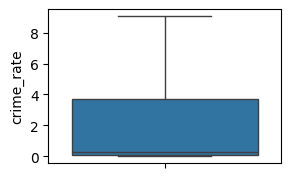

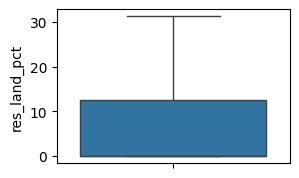

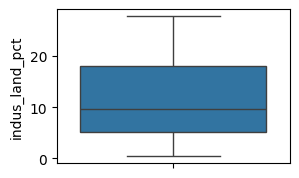

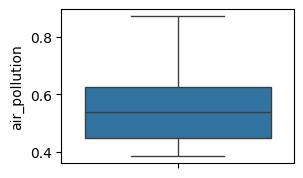

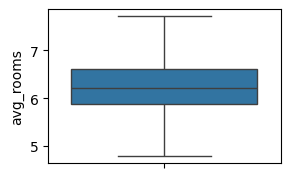

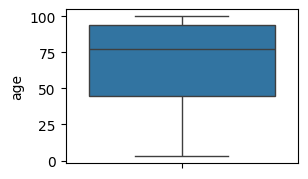

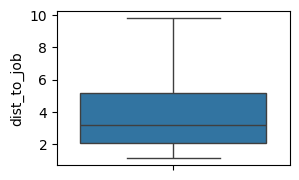

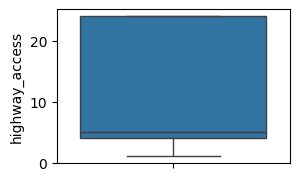

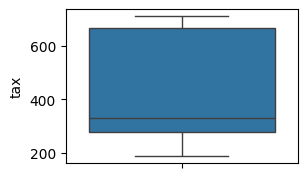

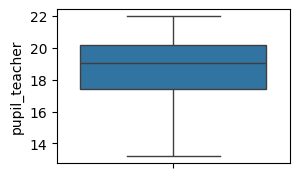

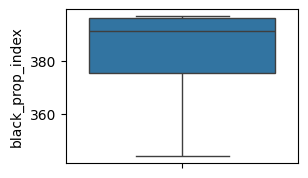

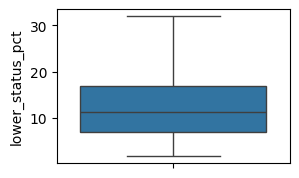

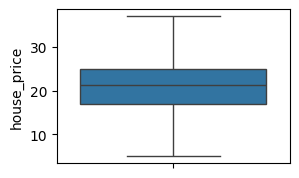

In [26]:
for col2 in numeric_col:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col2])
    plt.show()

In [27]:
#normalization
scaler = StandardScaler()

In [28]:
numeric_col2 = df.select_dtypes(include=['float64', 'int64']).columns.drop(['house_price'])

In [29]:
df[numeric_col2] = scaler.fit_transform(df[numeric_col2])

In [30]:
df.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct,house_price
0,-0.670290,0.918420,-1.287909,0,-0.144217,0.478652,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.088749,24.0
1,-0.663949,-0.579471,-0.593381,0,-0.740262,0.233258,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.495302,21.6
2,-0.663955,-0.579471,-0.593381,0,-0.740262,1.450665,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.224272,34.7
3,-0.662420,-0.579471,-1.306878,0,-0.835284,1.152688,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.379766,33.4
4,-0.651339,-0.579471,-1.306878,0,-0.835284,1.390114,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,-1.038819,36.2


In [31]:
# target / feature split
x = df.drop(['house_price'], axis=1)
y = df[['house_price']]

In [32]:
x.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct
0,-0.670290,0.918420,-1.287909,0,-0.144217,0.478652,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.088749
1,-0.663949,-0.579471,-0.593381,0,-0.740262,0.233258,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.495302
2,-0.663955,-0.579471,-0.593381,0,-0.740262,1.450665,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.224272
3,-0.662420,-0.579471,-1.306878,0,-0.835284,1.152688,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.379766
4,-0.651339,-0.579471,-1.306878,0,-0.835284,1.390114,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,-1.038819


In [33]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
xtrain.head()

,crime_rate,res_land_pct,indus_land_pct,near_river,air_pollution,avg_rooms,age,dist_to_job,highway_access,tax,pupil_teacher,black_prop_index,lower_status_pct
477,2.067808,-0.579471,1.015999,0,0.512296,-1.546642,1.021481,-0.814060,1.661245,1.530926,0.810609,-1.704072,1.754376
15,-0.482660,-0.579471,-0.437258,0,-0.144217,-0.702105,-0.429390,0.345624,-0.637962,-0.601276,1.184126,0.719747,-0.590881
332,-0.661728,2.021035,-0.740749,0,-1.008914,-0.388193,-1.610001,1.381597,-0.982843,-0.619094,-0.730148,-1.033240,-0.682180
423,1.457787,-0.579471,1.015999,0,0.512296,-0.273463,0.587642,-0.852218,1.661245,1.530926,0.810609,-1.986365,1.523274
19,-0.452930,-0.579471,-0.437258,0,-0.144217,-0.872606,0.032897,0.006071,-0.637962,-0.601276,1.184126,0.474424,-0.190019


In [35]:
ytrain.head()

,house_price
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2


In [36]:
#model implementation
lr = LinearRegression()
rid = Ridge()
knnr = KNeighborsRegressor()
lass = Lasso()

In [37]:
models = {'linear':LinearRegression(),
          'ridge': Ridge(),
          'KNNr': KNeighborsRegressor(),
          'lasso': Lasso()}

In [38]:
for model_name, model in models.items():
    print("Model name is:", model_name)
    model1 = model.fit(xtrain, ytrain)
    print("Train score:", model1.score(xtrain, ytrain))
    print("Test score:", model1.score(xtest, ytest))
    pred_y = model1.predict(xtest)
    mae = mean_absolute_error(ytest, pred_y)
    print("Mean Absolute Error:", mae)
    r2 = r2_score(ytest, pred_y)
    print("R2 score:", r2)
    print("<----------------------->")

Model name is: linear
Train score: 0.7900820737361731
Test score: 0.7594788136450763
Mean Absolute Error: 2.3619502929368172
R2 score: 0.7594788136450763
<----------------------->
Model name is: ridge
Train score: 0.7900533388393185
Test score: 0.7589070251786835
Mean Absolute Error: 2.3618954046104097
R2 score: 0.7589070251786835
<----------------------->
Model name is: KNNr
Train score: 0.879354124520786
Test score: 0.8183068169008241
Mean Absolute Error: 2.23093137254902
R2 score: 0.8183068169008241
<----------------------->
Model name is: lasso
Train score: 0.7203619942045751
Test score: 0.7171445477226776
Mean Absolute Error: 2.7888491913501037
R2 score: 0.7171445477226776
<----------------------->
